# Problem 4, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 4 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [27]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 4F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 4C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [24]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    loss = 0
    for i in range(len(X)):
        loss += (Y[i] - np.dot(w, X[i]))**2
    return loss

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    return (-2 * x * (y - np.dot(w, x)))

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    lost = []
    weights = []
    w = np.copy(w_start)
    
    for i in range(N_epochs):
        for j in range(len(X)):
            w = np.add(-eta * gradient(X[j], Y[j], w), w)
        
        lost.append(loss(X, Y, w))
        weights.append(w)
        
    return weights[-1], lost

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [25]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [33]:
w = [0.001, 0.001, 0.001, 0.001, 0.001]
eta = np.exp(-15)
Npoch = 800

x = []
data = load_data('data/sgd_data.csv')
x2 = data[:, 0:4]
y = data[:, 4:5]

for i in range(len(x2)):
    x.append(np.array([1, x2[i][0], x2[i][1], x2[i][2], x2[i][3]]))
    
weight, random = SGD(x, y, w, eta, Npoch)

print(weight)

[ -0.22720591  -5.94229011   3.94369494 -11.72402388   8.78549375]


## Problem 4G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

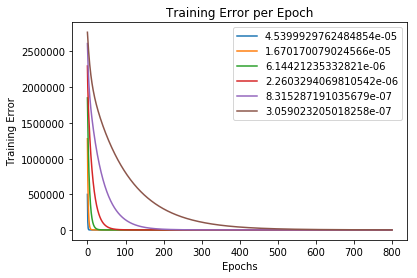

In [35]:
lr = [np.exp(-10), np.exp(-11), np.exp(-12), np.exp(-13), np.exp(-14), np.exp(-15)]
w = [0.001, 0.001, 0.001, 0.001, 0.001]
Npoch = 800

legendz = []
for q in lr:
    legendz.append(str(q))

longtime = []
for k in range(800):
    longtime.append(k)

x = []
data = load_data('data/sgd_data.csv')
x2 = data[:, 0:4]
y = data[:, 4:5]

for i in range(len(x2)):
    x.append(np.array([1, x2[i][0], x2[i][1], x2[i][2], x2[i][3]]))
  
plt.figure()
for j in lr:
    weight, lost = SGD(x, y, w, j, Npoch)
    plt.plot(longtime, lost)
plt.legend(legendz, loc = 'best')
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.title('Training Error per Epoch')
plt.show()

## Problem 4H

Provide your code for computing the least-squares analytical solution below.

In [41]:
x = []
data = load_data('data/sgd_data.csv')
x2 = data[:, 0:4]
y = data[:, 4:5]

for i in range(len(x2)):
    x.append(np.array([1, x2[i][0], x2[i][1], x2[i][2], x2[i][3]]))
    
right = np.linalg.pinv(x)
w = np.matmul(right, y)

print(np.transpose(w)[0])

[ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
